<a href="https://colab.research.google.com/github/DanMazerolle/SAGE-2024/blob/main/MATH2030_Project2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import jax
from functools import partial
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

### Task 1: Plot the solution

In [178]:
p = np.linspace(0, np.pi, 100)

# Single bowl
a = 0.499

# Double bowl
a = 0.501

L = lambda p: np.sin(2*p) + a*np.sin(4*p)
Lprime = lambda p: 2*np.cos(2*p) + 4*a*np.cos(4*p)

In [179]:
# Initial guess for the optimizer
p0 = 0.75

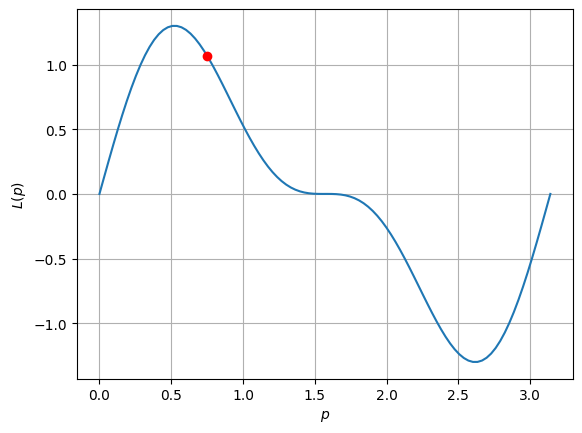

In [180]:
plt.plot(p, L(p))
plt.plot(p0,L(p0),'ro')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

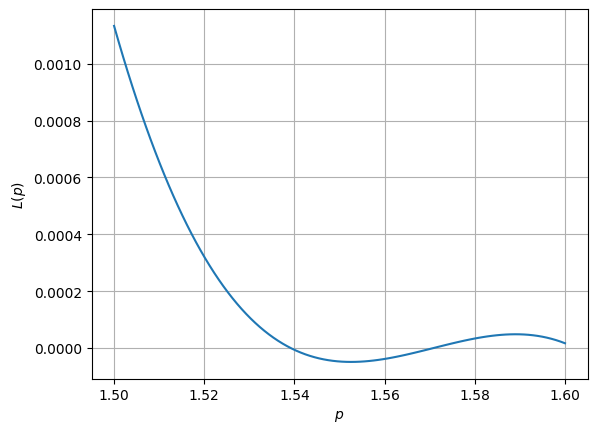

In [181]:
# Zoom into the solution
p = np.linspace(1.5, 1.6, 100)
plt.plot(p, L(p))
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

### Task 2: Implement vanilla gradient descent

In [182]:
# We need the gradient for the optimizer
Lprime = lambda p: 2*np.cos(2*p) + 4*a*np.cos(4*p)

# Using JAX
# import jax.numpy as jnp
# import jax
# jax.config.update("jax_enable_x64", True)
# L = lambda p: jnp.sin(2*p) + a*jnp.sin(4*p)
# Lprime = jax.grad(L)

In [183]:
# Learning rate
eta = 0.1

# Target error
targetErr = 1e-13

In [184]:
# Optimizers
def gradientDescent(p0, gradL):
  return p0 - eta*gradL(p0)

def momentumSGD(p0, gradL, m, beta = 0.9, nesterov=0):
  m = beta*m - eta*gradL(p0 + nesterov * beta * m)
  p0 = p0 + m
  return p0, m

def AdaGrad(p0, gradL, s):
  s = s + gradL(p0)*gradL(p0)
  p0 = p0 - eta*gradL(p0)/(np.sqrt(s) + 1e-5)
  return p0, s

def RMSProp(p0, gradL, s, beta=0.9):
  s = beta*s + (1-beta)*gradL(p0)*gradL(p0)
  p0 = p0 - eta*gradL(p0)/(np.sqrt(s) + 1e-5)
  return p0, s

def Adam(p0, gradL, m, s, t, beta1=0.9, beta2=0.999):
  t+= 1
  m = beta1*m + (1-beta1)*gradL(p0)
  s = beta2*s + (1-beta2)*gradL(p0)*gradL(p0)
  mh = m/(1-beta1**t)
  sh = s/(1-beta2**t)
  p0 = p0 - eta*mh/(np.sqrt(sh) + 1e-5)
  return p0, m, s, t

In [185]:
# SGD
currErr = targetErr + 0.01
steps = 0

p0 = 0.75

while currErr > targetErr:  # Note: Here you could also constrain the maximum number of steps
  p1 = gradientDescent(p0, Lprime)
  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  steps += 1

print(f'Minimum found p = {p0:2.8f} in {steps} steps.')

Minimum found p = 1.55255597 in 215 steps.


### Task 3: Plot to verify that the correct minimum was found

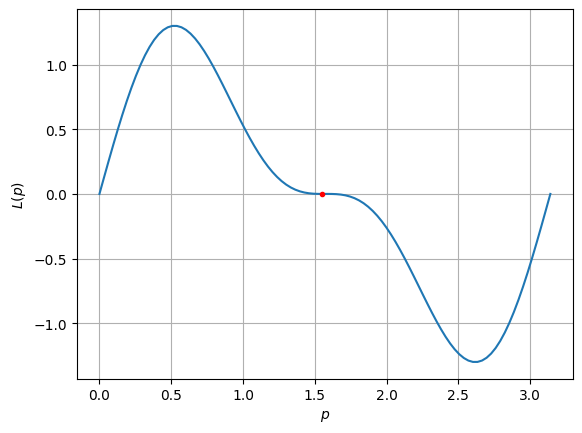

In [186]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))
plt.plot(p0, L(p0),'r.')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

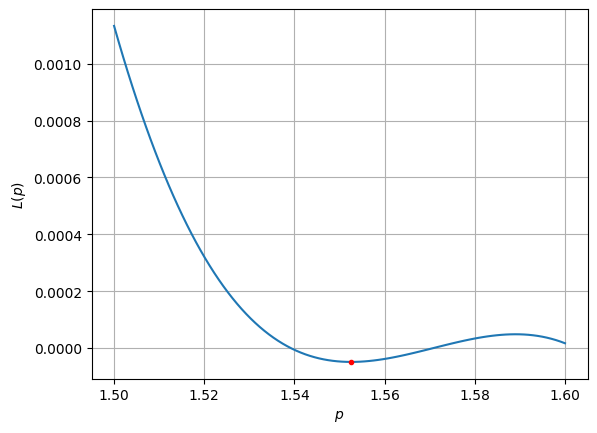

In [187]:
# Zoom into the solution
p = np.linspace(1.5, 1.6, 100)
plt.plot(p, L(p))
plt.plot(p0, L(p0),'r.')
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()

### Task 4: Implement the remaining optimizers

In [188]:
#momentum sgd
currErr = 1
steps = 0

p0 =0.75

#initial momentum
m = 0.0
p_values = [p0]
while currErr > targetErr:
  p1, m = momentumSGD(p0, Lprime, m)

  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  p_values.append(p0)
  steps += 1

print(f'Minimum found x = {p0} in {steps} steps.')

Minimum found x = 2.6181855686662203 in 270 steps.


# Plot the momentum SGD

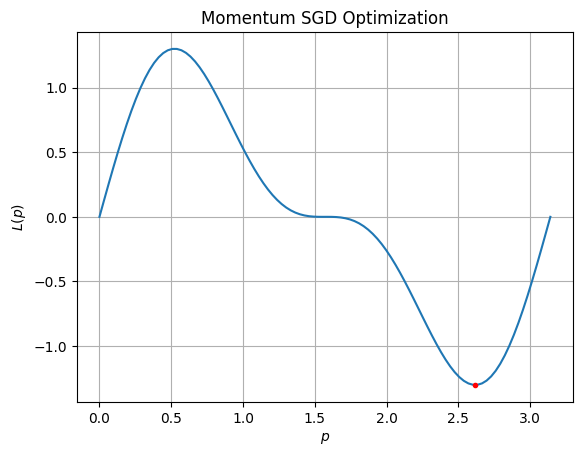

In [189]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))  # Plot the loss function
plt.plot(p0, L(p0), 'r.')  # Mark the final minimum found
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()
plt.title("Momentum SGD Optimization")
plt.show()



In [190]:
#Nesterov momentum SGD
currErr = 1
steps = 0

p0 = 0.75

#inital momentum
m = 0.0
p_values = [p0]
while currErr > targetErr:
  p1, m = momentumSGD(p0, Lprime, m, nesterov=1)
  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  p_values.append(p0)
  steps += 1

print(f'Minimum found x = {p0} in {steps} steps.')

Minimum found x = 2.6181860640669012 in 16 steps.


Plot the AdaGrad

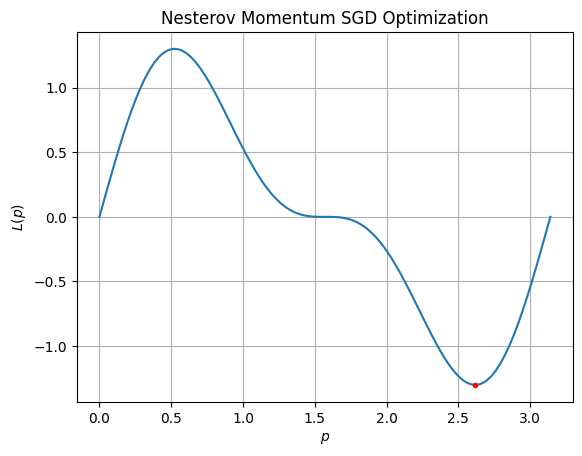

In [191]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))  # Plot the loss function
plt.plot(p0, L(p0), 'r.')  # Mark the final minimum found
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()
plt.title("Nesterov Momentum SGD Optimization")
plt.show()


In [192]:
#RMSprop
currErr = 1
steps = 0

p0 = 0.75

#Inital second momentum
s= 0.0
p_values = [p0]
while currErr > targetErr:
  p1, s = RMSProp(p0, Lprime, s)
  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  p_values.append(p0)
  steps += 1

print(f'Minimum found x = {p0} in {steps} steps.')


Minimum found x = 1.5525578415026853 in 47 steps.


Plot of RMSprop

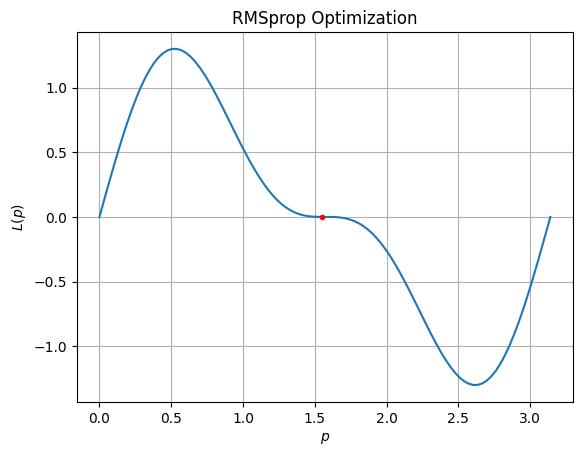

In [193]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))  # Plot the loss function
plt.plot(p0, L(p0), 'r.')  # Mark the final minimum found
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()
plt.title("RMSprop Optimization")
plt.show()


In [194]:
#Adam
currErr = 1
steps = 0

p0 = 0.75

#initalize first and second momentum and time step
s= 0.0
m= 0.0
t = 0
p_values = [p0]
while currErr > targetErr:
  p1, m, s, t =Adam(p0, Lprime, m, s, t)
  currErr = np.abs(L(p1)-L(p0))
  p0 = p1
  steps += 1

print(f'Minimum found x = {p0} in {steps} steps.')

Minimum found x = 2.61818645122932 in 286 steps.


Adam plot

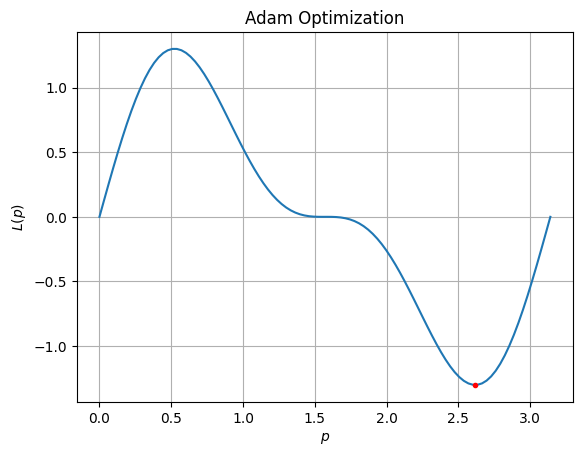

In [195]:
p = np.linspace(0, np.pi, 100)
plt.plot(p, L(p))  # Plot the loss function
plt.plot(p0, L(p0), 'r.')  # Mark the final minimum found
plt.xlabel('$p$')
plt.ylabel('$L(p)$')
plt.grid()
plt.title("Adam Optimization")
plt.show()
